# Here's an visualization of the K-Nearest Neighbors algorithm.

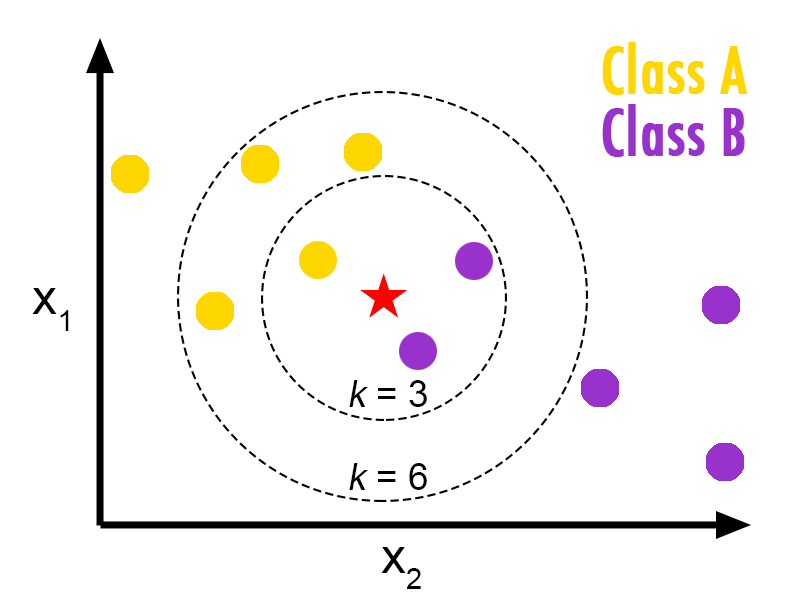

In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points), we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.

In this sense, it is important to consider the value of k. Hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (data points) when it predicts the classification of the test point.

In [1]:
#instal the scikit-learn library
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#import some inportant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing 
%matplotlib inline

In [5]:
#Download the dataset
!wget -O teleCust1001t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv

--2022-06-19 06:32:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36047 (35K) [text/csv]
Saving to: ‘teleCust1001t.csv’

teleCust1001t.csv   100%[===================>]  35.20K  --.-KB/s    in 0.04s   

2022-06-19 06:32:39 (910 KB/s) - ‘teleCust1001t.csv’ saved [36047/36047]



In [7]:
#Load the dataset
df = pd.read_csv('teleCust1001t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [9]:
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [12]:
#Let's see how many of each class in our dataset
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6cdc231950>]],
      dtype=object)

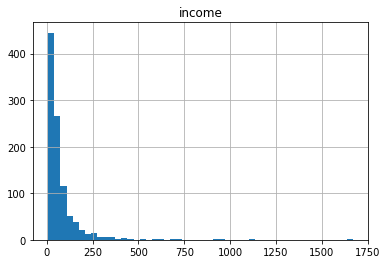

In [13]:
df.hist(column='income', bins=50)

In [15]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [16]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values


array([[ 2., 13., 44., ...,  0.,  0.,  2.],
       [ 3., 11., 33., ...,  0.,  0.,  6.],
       [ 3., 68., 52., ...,  0.,  1.,  2.],
       ...,
       [ 3., 67., 59., ...,  0.,  1.,  1.],
       [ 3., 70., 49., ...,  0.,  1.,  1.],
       [ 3., 50., 36., ...,  0.,  1.,  3.]])

In [20]:
y = df['custcat'].values


In [23]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train Set: ', X_train.shape, y_train.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (800, 11) (800,)
Test Set:  (200, 11) (200,)


# Now our dataset is ready for training We will use KKN from Scikit Learn

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Train the Model with training data

In [42]:
k = 5
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
neigh

KNeighborsClassifier()

# Test the model with test data

In [43]:
yhat = neigh.predict(X_test)
yhat

array([1, 3, 3, 4, 4, 3, 3, 4, 2, 4, 1, 4, 2, 1, 3, 1, 3, 3, 3, 4, 3, 2,
       1, 1, 1, 3, 2, 1, 1, 2, 3, 1, 4, 4, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       4, 1, 3, 1, 4, 4, 2, 1, 2, 3, 2, 3, 4, 3, 1, 4, 1, 4, 2, 3, 2, 1,
       1, 2, 2, 1, 1, 3, 2, 3, 2, 1, 1, 1, 2, 3, 3, 1, 2, 2, 4, 2, 3, 3,
       1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 3, 4, 2, 3, 3, 1, 1, 4, 2, 2, 1, 2,
       1, 2, 2, 4, 1, 2, 1, 3, 2, 3, 4, 1, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 4, 4, 1, 1, 2, 1, 1, 2, 2, 1, 2, 4, 3,
       2, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 4, 1, 1, 3, 1, 3, 3, 3, 2, 2, 2,
       1, 4, 1, 1, 1, 1, 1, 3, 3, 1, 2, 1, 4, 1, 3, 1, 3, 3, 3, 1, 1, 3,
       2, 3])

# Accuracy evaluation

In [44]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5375
Test set Accuracy:  0.315


In [47]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

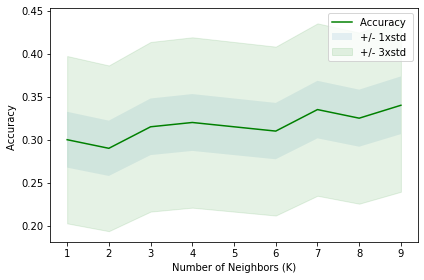

In [48]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()